In [5]:
# Machine learning classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# For data manipulation
import pandas as pd
# To plot
import matplotlib.pyplot as plt
import seaborn
import numpy as np

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  225.039993  225.830002  223.880005  225.240005  204.625183   
2017-01-04  225.619995  226.750000  225.610001  226.580002  205.842529   
2017-01-05  226.270004  226.580002  225.479996  226.399994  205.679016   
2017-01-06  226.529999  227.750000  225.899994  227.210007  206.414856   
2017-01-09  226.910004  227.070007  226.419998  226.460007  205.733490   
...                ...         ...         ...         ...         ...   
2021-12-27  472.059998  477.309998  472.010010  477.260010  473.735535   
2021-12-28  477.720001  478.809998  476.059998  476.869995  473.348389   
2021-12-29  476.980011  478.559998  475.920013  477.480011  473.953918   
2021-12-30  477.929993  479.000000  475.670013  476.160004  472.643646   
2021-12-31  475.640015  476.859985  474.670

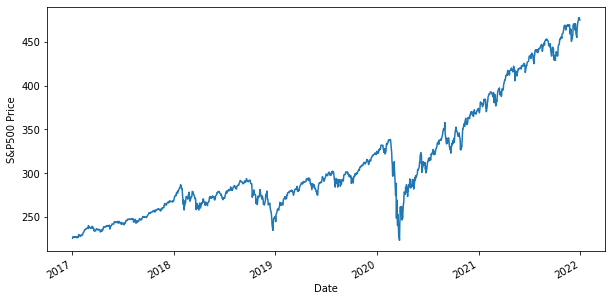

In [6]:
# Step 2: Fetch data
import yfinance as yf
Df = yf.download('SPY', start="2017-01-01", end="2022-01-01")
print(Df)
Df = Df.dropna()
Df.Close.plot(figsize=(10,5))
plt.ylabel("S&P500 Price")
plt.show()

In [7]:
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

In [13]:
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X=Df[['Open-Close','High-Low']]


In [14]:
split_percentage = 0.8
split = int(split_percentage*len(Df))
# Train data set
X_train = X[:split]
y_train = y[:split]
# Test data set
X_test = X[split:]
y_test = y[split:]

In [15]:
cls = SVC().fit(X_train, y_train)

In [16]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 56.80%
Test Accuracy: 57.94%


In [20]:
Df['Predicted_Signal'] = cls.predict(X)
# Calculate log returns
Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal
Df.Open


Date
2017-01-03    225.039993
2017-01-04    225.619995
2017-01-05    226.270004
2017-01-06    226.529999
2017-01-09    226.910004
                 ...    
2021-12-27    472.059998
2021-12-28    477.720001
2021-12-29    476.980011
2021-12-30    477.929993
2021-12-31    475.640015
Name: Open, Length: 1259, dtype: float64

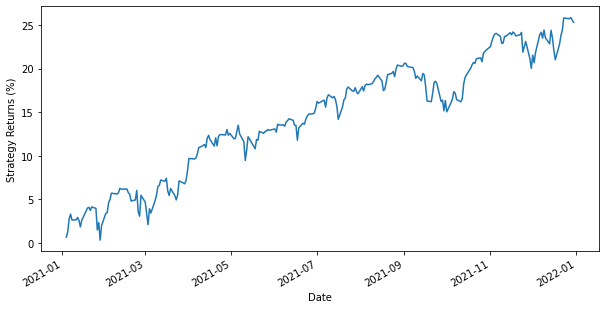

In [18]:
Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()